<a href="https://colab.research.google.com/github/Ortega1709/image-recognition/blob/master/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Simulation de Réseaux de Neurones Profonds pour la reconnaissance d'images**

Le projet consiste à développer une simulation de réseaux de neurones profonds pour la reconnaissance d'images. L'objectif est de créer un système capable d'apprendre à reconnaître et classifier des objets dans des images à partir d'un ensemble de données d'apprentissage.

Mount drive content and copy zip file to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/ASL/archive.zip"  "/content"

In [ ]:
!unzip "/content/archive.zip" -d "/content/Datasets"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/Datasets/Train_Alphabet/U/6f3439aa-c9f3-4279-830c-e7b417425835.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/6fc70b21-eb34-42e6-8fa5-368a753a311e.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/700d1cf4-d43f-4d04-ba14-bbb6e9273c38.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/703451c9-380e-41a3-962e-0ef7290f04ec.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/7068eb2d-4d24-4a05-bddf-63fc4e296005.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/706cde46-580e-42d7-8752-2a751d4a2d1a.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/70a03f73-8d9b-48e1-b7d2-d1269fe44efc.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/70b8a34d-9529-4ed3-9570-cdf55ae9659e.rgb_0000.png  
  inflating: /content/Datasets/Train_Alphabet/U/70ddd4cc-3a15-4b37-bd9d-ea70752e74bb.rgb_0000.png  
  inflating: /content/

In [ ]:
!cp -r "/content/Datasets/Test_Alphabet"  "/content/Datasets/Validation_Alphabet"

##**Importations essentielles.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
import keras.layers
from keras.models import Sequential
from datetime import datetime

##**Entrainement du modèle**

In [ ]:
# get dataset paths
asl_data_train_path = "/content/Datasets/Train_Alphabet"
asl_data_test_path = "/content/Datasets/Test_Alphabet"
asl_data_validation_path = "/content/Datasets/Validation_Alphabet"

In [ ]:
# image size
img_height = 180
img_width = 180

In [ ]:
# get train dataset informations
asl_data_train = keras.utils.image_dataset_from_directory(
    asl_data_train_path,
    shuffle=True,
    image_size = (img_height, img_width),
    batch_size = 32,
    validation_split=False
)

Found 24300 files belonging to 27 classes.


In [ ]:
# get validation dataset informations
asl_data_validation = keras.utils.image_dataset_from_directory(
    asl_data_validation_path,
    shuffle=False,
    image_size = (img_height, img_width),
    batch_size = 32,
    validation_split=False
)

Found 2700 files belonging to 27 classes.


In [ ]:
# get test dataset informations
asl_data_test = keras.utils.image_dataset_from_directory(
    asl_data_test_path,
    shuffle=False,
    image_size = (img_height, img_width),
    batch_size = 32,
    validation_split=False
)

Found 2700 files belonging to 27 classes.


In [ ]:
# get dataset categories
class_names = asl_data_train.class_names
print(class_names)

['A', 'B', 'Blank', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


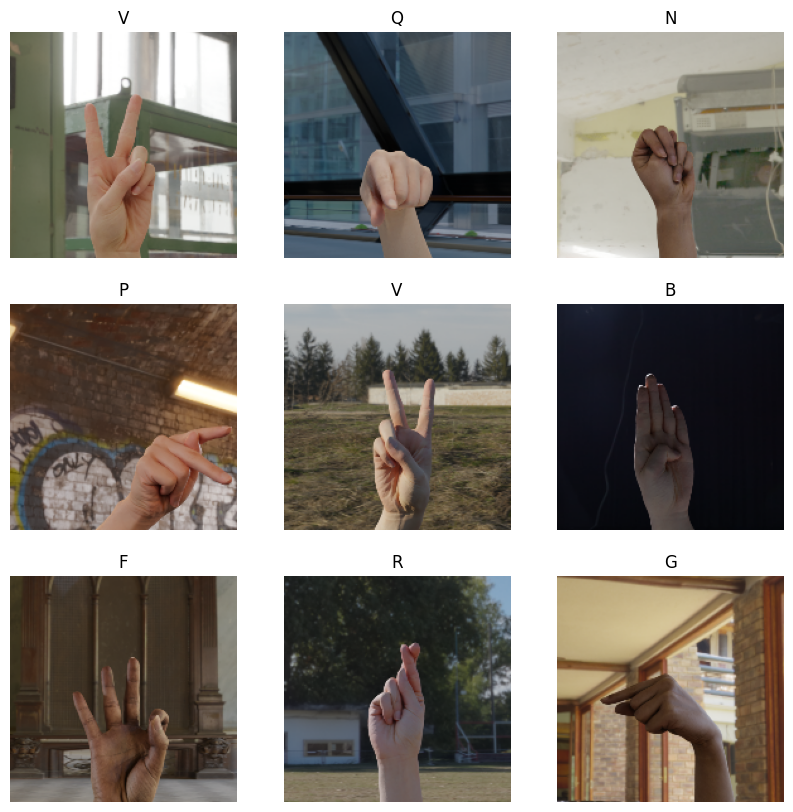

In [ ]:
# show figure for each data train
plt.figure(figsize=(10, 10))
for images, labels in asl_data_train.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##**Entrainement du modèle de manière séquentielle et sans utilisation du GPU.**


In [ ]:
# définition du modèle.
model = Sequential([
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128),
    keras.layers.Dense(len(class_names))
  ])

  # entrainement du modèle CNN
model.compile(
      optimizer='adam',
      loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

epochs_size = 10
start_time = datetime.now()

history = model.fit(
    asl_data_train,
    validation_data=asl_data_validation,
    epochs=epochs_size
  )

end_time = datetime.now()
training_time = (end_time - start_time).total_seconds()
print(f"Temps d'apprentissage : {training_time} secondes")


Epoch 1/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 1228s 2s/step - accuracy: 0.5863 - loss: 1.5016 - val_accuracy: 0.9485 - val_loss: 0.1736
Epoch 2/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 1235s 2s/step - accuracy: 0.9733 - loss: 0.0886 - val_accuracy: 0.9685 - val_loss: 0.1147
Epoch 3/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 1212s 2s/step - accuracy: 0.9877 - loss: 0.0421 - val_accuracy: 0.9707 - val_loss: 0.0997
Epoch 4/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 1206s 2s/step - accuracy: 0.9909 - loss: 0.0282 - val_accuracy: 0.9770 - val_loss: 0.0798
Epoch 5/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 1186s 2s/step - accuracy: 0.9935 - loss: 0.0234 - val_accuracy: 0.9685 - val_loss: 0.1282
Epoch 6/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 1199s 2s/step - accuracy: 0.9909 - loss: 0.0279 - val_accuracy: 0.9830 - val_loss: 0.0791
Epoch 7/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 1188s 2s/step - accuracy: 0.9940 - loss: 0.0201 - val_accuracy: 0.9856 - val_loss: 0.0603
Epoch 8/10
345/760 ━━━━━━━━━━━━━━━━━━━━ 10:01 1s/step - accuracy: 0.9946 - loss: 0.0160

##**Entrainement du modèle de façon parallèle**
**NB**: Faudrait modifier les paramètres d'exécution pour passer sur GPU afin que cette cellule de code soit efficace.

In [ ]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
  # définition du modèle.
  model = Sequential([
      keras.layers.Rescaling(1./255),
      keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
      keras.layers.MaxPooling2D(),
      keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
      keras.layers.MaxPooling2D(),
      keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
      keras.layers.MaxPooling2D(),
      keras.layers.Flatten(),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(128),
      keras.layers.Dense(len(class_names))
    ])

  # entrainement du modèle CNN
  model.compile(
        optimizer='adam',
        loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

  epochs_size = 10
  start_time = datetime.now()

  history = model.fit(
      asl_data_train,
      validation_data=asl_data_validation,
      epochs=epochs_size
    )

  end_time = datetime.now()
  training_time = (end_time - start_time).total_seconds()
  print(f"Temps d'apprentissage : {training_time} secondes")

In [ ]:
image = "/content/WhatsApp Image 2024-07-29 at 14.25.54.jpeg"
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)
predictions = model.predict(img_bat)

In [ ]:
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to T with a 99.74 percent confidence.


In [ ]:
# enregistrement du modèle
model.save('ortega_maria_asl_classifier.keras')